<img src="Figures/top_ML.png" alt="Drawing" style="width: 1100px;"/>

# EJERCICIO 
# Aprendizaje no supervisado: Clustering.

## *Segmentación de clientes*


En el aprendizaje no supervisado, la tarea clásica es el **análisis de clusters** (grupos) en el que se encuentran patrones o grupos ocultos en los datos. La mayoría de las veces las tareas de aprendizaje no supervisado tienen una *solución abierta*, por lo que hay que interpretar los resultados y comprobar si tienen sentido.

**Objetivo:** En este ejemplo, se realizará un clustering de datos sobre clientes de una empresa de comestibles. La segmentación de clientes es la práctica de separar a los clientes en grupos que reflejen similitudes. Se dividirá a los clientes en segmentos para optimizar la importancia de cada uno de ellos. Así, la empresa podrá modificar los productos en función de las distintas necesidades y comportamientos de los clientes. También ayuda a la empresa a atender las preocupaciones de distintos tipos de clientes.

### Antes de empezar:

* En el archivo **marketing_campaign.csv** se encuentra el conjunto de datos de entrada de este ejemplo (atributos). 
* **NO** existen las etiquetas en el Aprendizaje **NO Supervisado**. 

## **1. Importar librerías y datos**

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Librería de visualización de datos
plt.style.use('seaborn')

C:\Users\marcjene\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. Resumen estadístico del conjunto de datos de entrada.

In [2]:
# Primera visualización del dataset
df_clientes = pd.read_csv('Data/marketing_campaign.csv', sep="\t")
df_clientes.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?**

In [3]:
# Dimensión de los datos de entrada (filas x columnas)
df_clientes.shape

(2240, 29)

In [4]:
# Ya hemos visto el "head", vamos a ver el "tail"
df_clientes.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


**2. ¿Qué significan?**

In [5]:
# Información sobre el dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# También podemos obtener el nombre de las columnas
df_clientes.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Se comprueba el tipo de variable de cada columna
df_clientes.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

**3. ¿Falta algún dato?** Se comprueba si falta algún dato, y de ser así, se realiza el recuento de celdas vacías en cada atributo. En este caso, no falta ningún dato en el conjunto de datos de entrada (no existen valores *Nan*).

In [7]:
df_clientes.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# ¿Qué hacer con los valores NaN? Una solución fácil para este dataset (>2000 filas) seria eliminar las filas con valores NaN
df_clientes.dropna(inplace=True)
df_clientes.shape

(2216, 29)

In [9]:
# Comprobamos que ya no faltan más valores
df_clientes.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

**4. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [10]:
# Evaluamos la naturaleza de los datos con datos estadísticos descriptivos
df_clientes.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## **3. Limpieza de datos**

Antes de empezar a trabajar con los datos, estos se tienen que limpiar (anteriormente ya se han eliminado los NaNs) y transformar en otros features en caso de ser necesario 

In [11]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

De la función `df_clientes.info()` vemos que ya no tenemos ningun valor nulo, que la columna 'Dt_Customer' está en formato `object` en vez de `DateTime` y que hay 2 columnas más con formato `object`, en las cuales se tendrá que aplicar un encoder

In [12]:
# Cambiamos el formato de la columna 'Dt_Customer' a DateTime

df_clientes["Dt_Customer"] = pd.to_datetime(df_clientes["Dt_Customer"])

# Para que tenga más sentido, cambiamos la fecha en la que una persona se hizo cliente por una variable que cuente
# los días que esa persona lleva siendo cliente. e.g.: ["Customer_For"]

fechas = list(df_clientes["Dt_Customer"])
ultima_fecha = max(fechas)

lista_duracion = []
for d in fechas:
    duracion = ultima_fecha - d
    lista_duracion.append(duracion.days)

df_clientes["Customer_For"] = lista_duracion
df_clientes["Customer_For"] = pd.to_numeric(df_clientes["Customer_For"])
df_clientes.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,321


In [13]:
print("Total categories in the feature Marital_Status:\n", df_clientes["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df_clientes["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


A continuación, realizaremos los siguientes pasos para crear algunos Features nuevos:

* Extraer la "Age" de un cliente por el "Year_Birth" indicando el año de nacimiento de la persona respectiva.
* Crear otra función "Spent" que indique la cantidad total gastada por el cliente en varias categorías en un periodo de dos años.
* Cree otra característica "Living_With" a partir de "Estado_marital" para extraer la situación de vida de las parejas.
* Crear una función "Children" para indicar el total de hijos de un hogar, es decir, niños (Kidhome) y adolescentes (Teenhome).
* Para obtener una mayor claridad del hogar, crear una característica que indique "Family_Size".
* Crear una característica "Is_Parent" para indicar la situación de paternidad
* Por último, crearé tres categorías en "Education" simplificando sus recuentos de valores.
* Tambien eliminaremos algunas de las características redundantes

In [14]:
#Feature Engineering
#Age of customer today 
df_clientes["Age"] = 2023-df_clientes["Year_Birth"]

#Total spendings on various items
df_clientes["Spent"] = df_clientes["MntWines"]+ df_clientes["MntFruits"]+ df_clientes["MntMeatProducts"]+ df_clientes["MntFishProducts"]+ df_clientes["MntSweetProducts"]+ df_clientes["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df_clientes["Living_With"]=df_clientes["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df_clientes["Children"]=df_clientes["Kidhome"]+df_clientes["Teenhome"]

#Feature for total members in the household
df_clientes["Family_Size"] = df_clientes["Living_With"].replace({"Alone": 1, "Partner":2})+ df_clientes["Children"]

#Feature pertaining parenthood
df_clientes["Is_Parent"] = np.where(df_clientes.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_clientes["Education"]=df_clientes["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df_cluster = df_clientes.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df_cluster = df_cluster.drop(to_drop, axis=1)
df_cluster

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,971,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,125,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,472,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,65,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,321,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,541,56,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,61,77,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,315,42,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,316,67,843,Partner,1,3,1


Ahora, vamos a visualizar los datos para tener más información de ellos.

**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

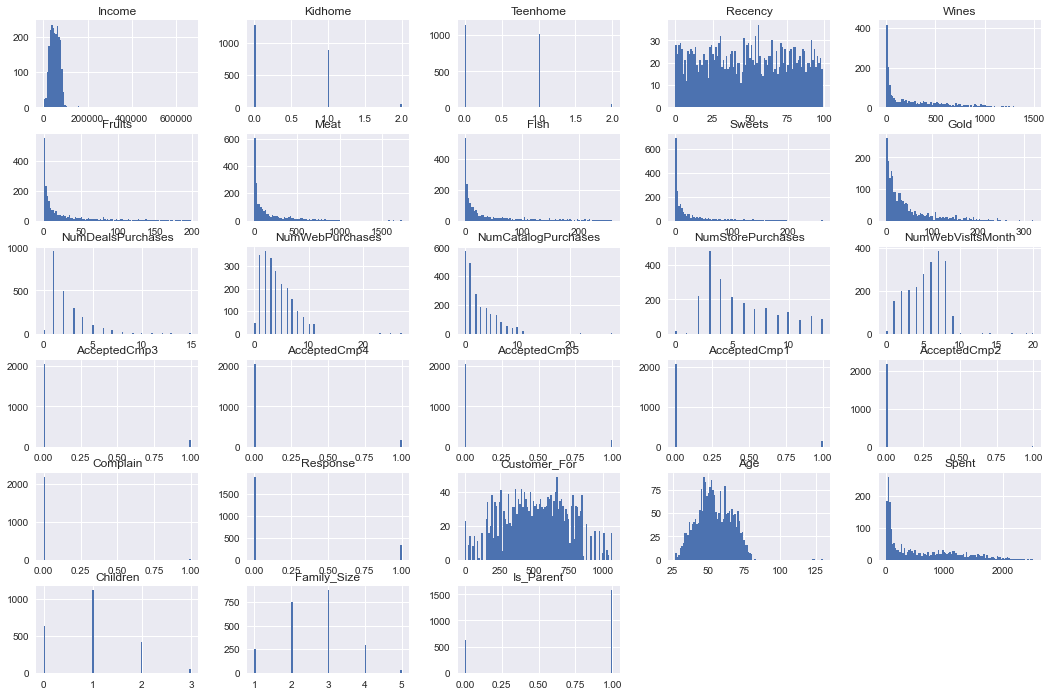

In [15]:
histograma = df_cluster.hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(18, 12))

Algunas categorias (como Income y Age) parecen tener outliers. Vamos a comprobarlo con un boxplot y en caso de que sea necesario, eliminamos los outliers.

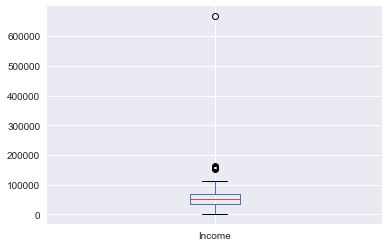

In [16]:
boxplot = df_cluster.boxplot(column=['Income'])

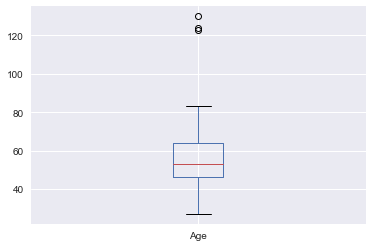

In [17]:
boxplot = df_cluster.boxplot(column=['Age'])

In [18]:
# Eliminamos los outliers poniendo un tope a estas dos variables
df_cluster = df_cluster[(df_cluster["Age"]<90)]
df_cluster = df_cluster[(df_cluster["Income"]<200000)]
len(df_cluster)
df_cluster.reset_index(drop=True, inplace=True)
df_cluster

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,971,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,125,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,472,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,65,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,321,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,541,56,1341,Partner,1,3,1
2208,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,61,77,444,Partner,3,5,1
2209,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,315,42,1241,Alone,0,1,0
2210,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,316,67,843,Partner,1,3,1


Ahora, vamos a mirar la correlación entre variables (excluyendo los atributos categoricos).

<AxesSubplot:>

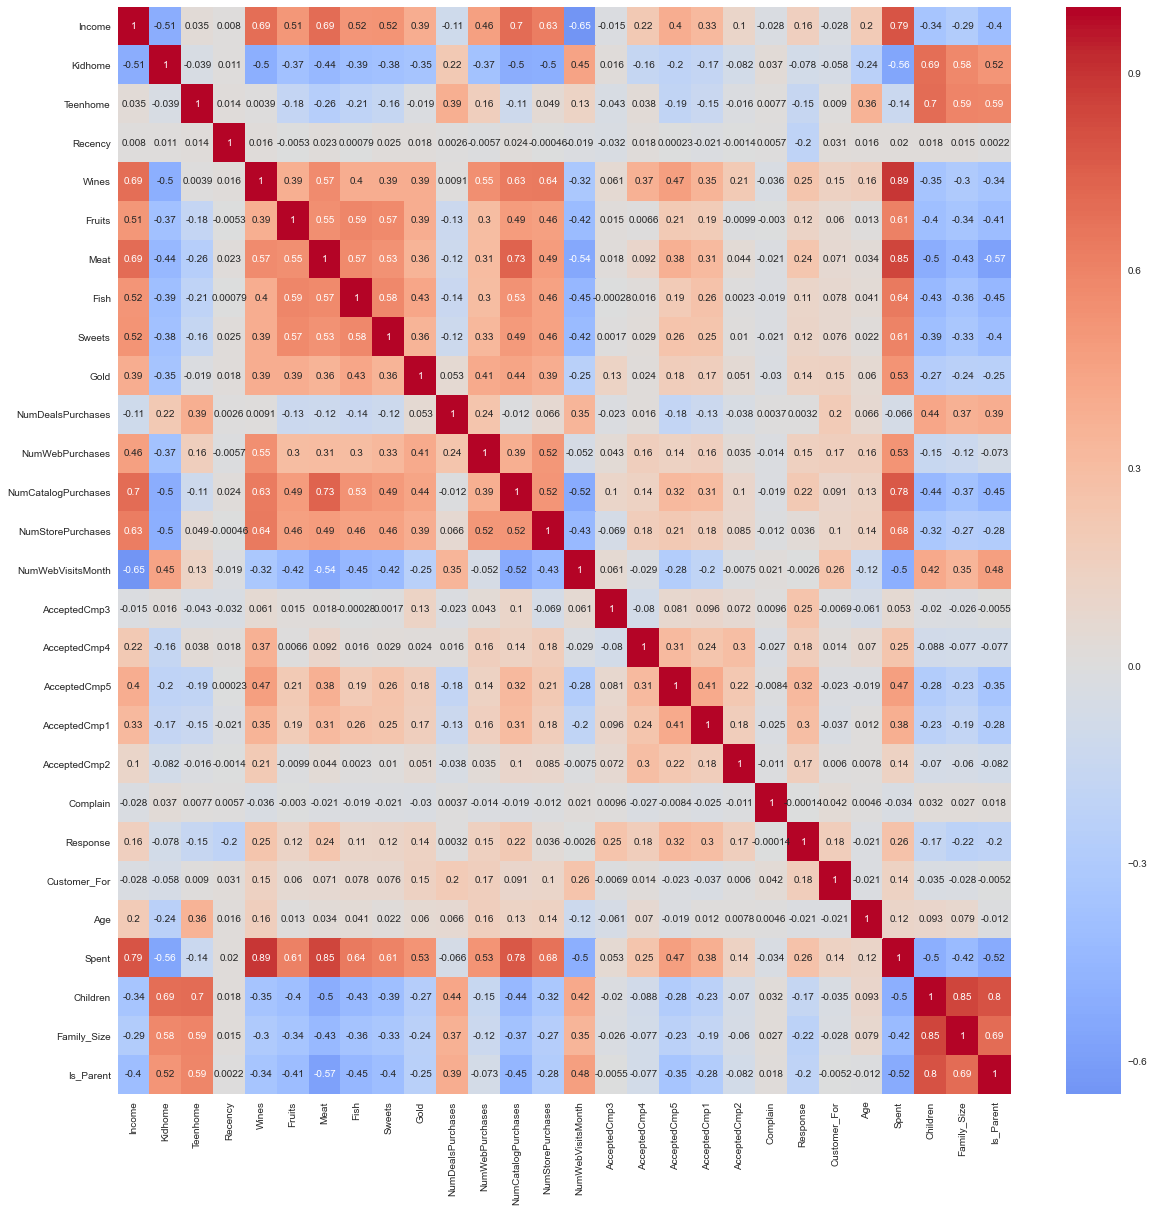

In [19]:
#correlation matrix
corrmat= df_cluster.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)

## *4. Procesamiento de los datos*

1. Encoding para las variables categóricas.
2. Escalar los datos usando el Standard Scaler.

**1. Encoding para las variables categóricas**. 

In [20]:
# Obtener lista de variables categóricas
cat = (df_cluster.dtypes == 'object')
cols_cat = list(cat[cat].index)
cols_cat

print("Variables categoricas en el dataset:", cols_cat)

Variables categoricas en el dataset: ['Education', 'Living_With']


In [21]:
print("Variables Education:", df_cluster['Education'].unique())
print("Variables Living_With:", df_cluster['Living_With'].unique())

Variables Education: ['Graduate' 'Postgraduate' 'Undergraduate']
Variables Living_With: ['Alone' 'Partner']


In [22]:
# Con el método .replace podemos hacer un Label Encoding de manera manual respetando el orden de los valores

# Education
df_cluster['Education'] = df_cluster['Education'].replace({"Undergraduate": 0, "Graduate":1, "Postgraduate":2})

# Living_With
df_cluster['Living_With'] = df_cluster['Living_With'].replace({"Alone": 0, "Partner":1})
    
print("All features are now numerical")

All features are now numerical


In [23]:
df_cluster.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,971,66,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,125,69,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,472,58,776,1,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,65,39,53,1,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,321,42,422,1,1,3,1


**Paso extra: reducimos el número de columnas para entender mejor el algoritmo**

Nos quedaremos solo con las siguientes columnas: 'Income', 'Spent', 'Age', 'Customer_For' y 'Family_Size'

In [24]:
df_cluster_reduced = df_cluster[['Income', 'Spent', 'Age', 'Customer_For', 'Family_Size']].copy()
df_cluster_reduced.head()

,Income,Spent,Age,Customer_For,Family_Size
0,58138.0,1617,66,971,1
1,46344.0,27,69,125,3
2,71613.0,776,58,472,2
3,26646.0,53,39,65,3
4,58293.0,422,42,321,3


**2. Escalar los datos**. 

Se escalan los datos utilizando el método de *StandardScaler()*

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_cluster_reduced.values.copy()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_scale

,0,1,2,3,4
0,0.287105,1.676245,1.018352,1.973583,-1.758359
1,-0.260882,-0.963297,1.274785,-1.665144,0.449070
2,0.913196,0.280110,0.334530,-0.172664,-0.654644
3,-1.176114,-0.920135,-1.289547,-1.923210,0.449070
4,0.294307,-0.307562,-1.033114,-0.822130,0.449070
...,...,...,...,...,...
2207,0.430444,1.218061,0.163575,0.124112,0.449070
2208,0.560123,-0.271040,1.958607,-1.940414,2.656499
2209,0.233347,1.052052,-1.033114,-0.847936,-1.758359
2210,0.803172,0.391336,1.103830,-0.843635,0.449070


## 5. Construcción del modelo de aprendizaje NO supervisado: Clustering de consumos utilizando K-means

Se agrupan los datos utilizando el algoritmo [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

El algoritmo K-means necesita que se le indique el número de clústers en que se quieren agrupar los datos. Se ejecuta el algoritmo para varios clusters y luego se comparan los resultados utilizando el método Elbow, que indicará el número óptimo de clusters.

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

elbow_method = []

# Evalúo el algoritmo K-means para un rango de [1,15] clústers 
n_cluster_list = range(1,15)

### ¿Cómo saber el número óptimo de clusters? Con el método de Elbow.
Se utiliza el [Método de Elbow] para ayudarnos a elegir el número óptimo de clusters. 

* Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide.
* Para hacer uso de este método partimos del cálculo de la distorsión promedio de cada clúster, esto es la distancia de cada elemento con su centroide correspondiente.
* Buscamos la parte de la gráfica donde la línea es menos suave o cambia abruptamente lo que forma un “codo”.

[Método de Elbow]: https://jarroba.com/seleccion-del-numero-optimo-clusters/


<img src="Figures/elbow-method.png" alt="Drawing" style="width: 800px;"/>

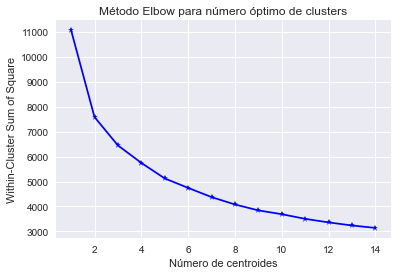

In [27]:
import matplotlib.pyplot as plt

# Iteración para evaluar K-means para diferentes números de clusters (n_clusters)
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_found = kmeans.fit_predict(X_scale)
    elbow_method.append(kmeans.inertia_) 


# Gráfica del método de Elbow
plt.plot(n_cluster_list, elbow_method, 'b', marker='*')
plt.xlabel('Número de centroides')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Método Elbow para número óptimo de clusters')
plt.show()

# El número óptimo de clusters es de k=2

In [28]:
# Entreno el K-means para k=2, visto el resultado del método Elbow
kmeans = KMeans(n_clusters=2)
cluster_found = kmeans.fit_predict(X_scale)

df_cluster_def = df_cluster_reduced.copy()
df_cluster_def['cluster'] = pd.Series(cluster_found)
df_cluster_def

,Income,Spent,Age,Customer_For,Family_Size,cluster
0,58138.0,1617,66,971,1,0
1,46344.0,27,69,125,3,1
2,71613.0,776,58,472,2,0
3,26646.0,53,39,65,3,1
4,58293.0,422,42,321,3,1
...,...,...,...,...,...,...
2207,61223.0,1341,56,541,3,0
2208,64014.0,444,77,61,5,1
2209,56981.0,1241,42,315,1,0
2210,69245.0,843,67,316,3,0


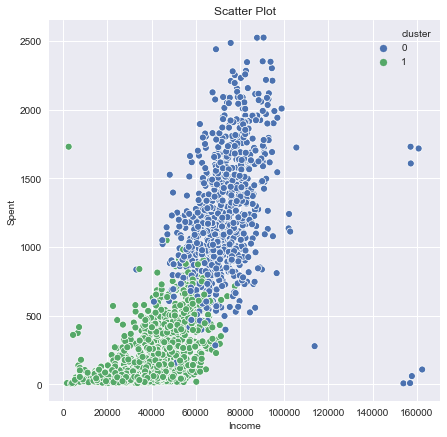

In [29]:
# Hacemos scatter plot entre 'Income' y 'Spent'
plt.figure(figsize=(7,7))
sns.scatterplot(df_cluster_def["Income"], df_cluster_def["Spent"], hue= df_cluster_def["cluster"])

# Estética del plot
plt.title('Scatter Plot', fontsize=12)
plt.xlabel('Income', fontsize=10)
plt.ylabel('Spent', fontsize=10)

plt.show()

K-means ha encontrado dos clúster con las siguientes características, mirando la gráfica anterior:
* El clúster azul concentra los consumidores que más gastan, los cuales en general tienen unos ingresos superiores
* El clúster verde concentra los consumidores con menores gastos.


## Validar los resultados con Dimensionality Reduction (PCA)
Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. En este caso, podemos trabajar con el dataset original (previo a reducirlo), ya que con este método se reducen las "features" conservando el máximo de información.

Repetimos los pasos seguidos anteriormente pero con todas las variables.

Una forma de validar los resultados del algoritmo clustering es mediante técnicas de dimensionality reduction. Hay que tener en cuenta es que el PCA no sabe nada de los grupos encontrados por K-means.

In [42]:
df_cluster.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,971,66,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,125,69,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,472,58,776,1,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,65,39,53,1,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,321,42,422,1,1,3,1


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_cluster.values.copy()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_scale

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.117256,-0.09552,2.375425,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.117256,-0.09552,-0.420977,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.117256,-0.09552,-0.420977,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.117256,-0.09552,-0.420977,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.117256,-0.09552,-0.420977,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.411675,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,-0.117256,-0.09552,-0.420977,0.124112,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,1.123949,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.117256,-0.09552,-0.420977,-1.940414,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.411675,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,-0.117256,-0.09552,-0.420977,-0.847936,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,1.123949,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,-0.117256,-0.09552,-0.420977,-0.843635,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


### Extra: Encontrar el número óptimo de clústers mediante el Silhouette Score 

In [46]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Evalúo el algoritmo K-means para un rango de [2,15] clústers 
n_cluster_list = range(2,15)

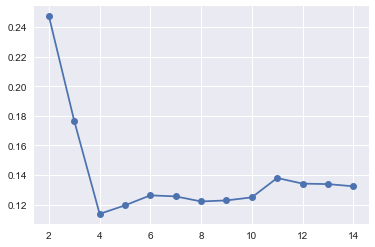

In [47]:
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_found = kmeans.fit_predict(X_scale)
    silhouette_scores.append(silhouette_score(X_scale, kmeans.labels_, random_state=0))

silhouette_metric = pd.DataFrame(index=n_cluster_list, columns=['silhouette_score'], data=silhouette_scores)
plt.plot(silhouette_metric, marker='o')

In [50]:
# Entreno el K-means para k=3, ya que el resultado no es malo del todo y queremos probar un número de clústers distinto a 2
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X_scale)

df_cluster_def = df_cluster.copy()
df_cluster_def['cluster'] = pd.Series(cluster_found)
df_cluster_def

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,cluster
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,1,971,66,1617,0,0,1,0,1
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,125,69,27,0,2,3,1,0
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,472,58,776,1,0,2,0,1
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,65,39,53,1,1,3,1,0
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,321,42,422,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1,61223.0,0,1,46,709,43,182,42,118,...,0,0,541,56,1341,1,1,3,1,2
2208,2,64014.0,2,1,56,406,0,30,0,0,...,0,0,61,77,444,1,3,5,1,2
2209,1,56981.0,0,0,91,908,48,217,32,12,...,0,0,315,42,1241,0,0,1,0,1
2210,2,69245.0,0,1,8,428,30,214,80,30,...,0,0,316,67,843,1,1,3,1,2


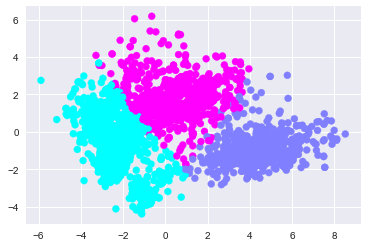

In [51]:
from sklearn.decomposition import PCA
import matplotlib.colors

pca = PCA(n_components=2)
results_pca = pca.fit_transform(X_scale)

plt.scatter(results_pca[:, 0], results_pca[:, 1],
            c = df_cluster_def['cluster'],
            cmap = 'cool'
            )
plt.show()

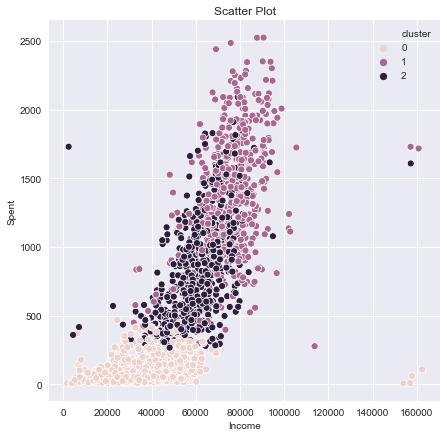

In [52]:
# Hacemos scatter plot entre 'Income' y 'Spent'
plt.figure(figsize=(7,7))
sns.scatterplot(df_cluster_def["Income"], df_cluster_def["Spent"], hue= df_cluster_def["cluster"])

# Estética del plot
plt.title('Scatter Plot', fontsize=12)
plt.xlabel('Income', fontsize=10)
plt.ylabel('Spent', fontsize=10)

plt.show()